In [1]:
import numpy as np
import matplotlib.pyplot as plt

from coremdlr.facies.datasets import FaciesDataset

Using TensorFlow backend.


## pGR scaling mode comparison

**Note: always scaled by well**

/home/administrator/Dropbox/core_data/facies/train_data 205-21b-3
/home/administrator/Dropbox/core_data/facies/train_data 204-20-6a
/home/administrator/Dropbox/core_data/facies/train_data 204-20-1Z
/home/administrator/Dropbox/core_data/facies/train_data 204-19-6
/home/administrator/Dropbox/core_data/facies/train_data 204-24a-6
Loading Well:  205-21b-3
Feature shapes:  [('depth', (3842,)), ('pseudoGR', (3842, 32))]
Loading Well:  204-20-6a
Feature shapes:  [('depth', (3868,)), ('pseudoGR', (3868, 32))]
Loading Well:  204-20-1Z
Feature shapes:  [('depth', (2341,)), ('pseudoGR', (2341, 32))]
Loading Well:  204-19-6
Feature shapes:  [('depth', (1887,)), ('pseudoGR', (1887, 32))]
Loading Well:  204-24a-6
Feature shapes:  [('depth', (13007,)), ('pseudoGR', (13007, 32))]


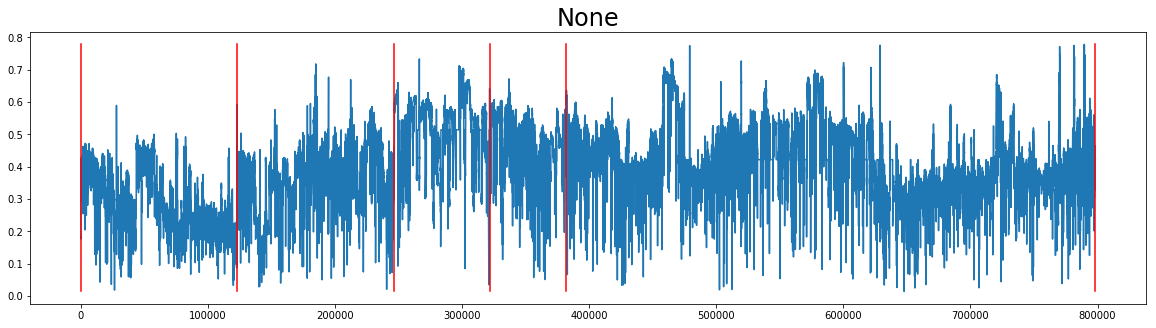

/home/administrator/Dropbox/core_data/facies/train_data 205-21b-3
/home/administrator/Dropbox/core_data/facies/train_data 204-20-6a
/home/administrator/Dropbox/core_data/facies/train_data 204-20-1Z
/home/administrator/Dropbox/core_data/facies/train_data 204-19-6
/home/administrator/Dropbox/core_data/facies/train_data 204-24a-6
Loading Well:  205-21b-3
Feature shapes:  [('depth', (3841,)), ('pseudoGR', (3841, 32))]
Loading Well:  204-20-6a
Feature shapes:  [('depth', (3871,)), ('pseudoGR', (3871, 32))]
Loading Well:  204-20-1Z
Feature shapes:  [('depth', (2341,)), ('pseudoGR', (2341, 32))]
Loading Well:  204-19-6
Feature shapes:  [('depth', (1882,)), ('pseudoGR', (1882, 32))]
Loading Well:  204-24a-6
Feature shapes:  [('depth', (13004,)), ('pseudoGR', (13004, 32))]


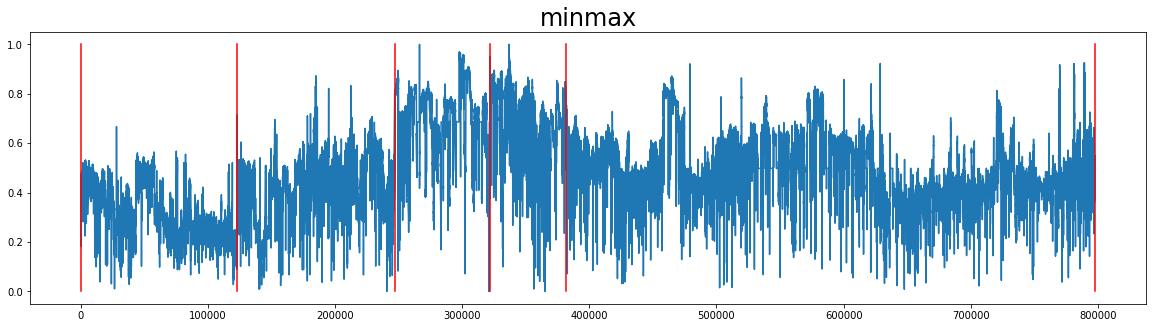

/home/administrator/Dropbox/core_data/facies/train_data 205-21b-3
/home/administrator/Dropbox/core_data/facies/train_data 204-20-6a
/home/administrator/Dropbox/core_data/facies/train_data 204-20-1Z
/home/administrator/Dropbox/core_data/facies/train_data 204-19-6
/home/administrator/Dropbox/core_data/facies/train_data 204-24a-6
Loading Well:  205-21b-3
Feature shapes:  [('depth', (3842,)), ('pseudoGR', (3842, 32))]
Loading Well:  204-20-6a
Feature shapes:  [('depth', (3873,)), ('pseudoGR', (3873, 32))]
Loading Well:  204-20-1Z
Feature shapes:  [('depth', (2341,)), ('pseudoGR', (2341, 32))]
Loading Well:  204-19-6
Feature shapes:  [('depth', (1885,)), ('pseudoGR', (1885, 32))]
Loading Well:  204-24a-6
Feature shapes:  [('depth', (13011,)), ('pseudoGR', (13011, 32))]


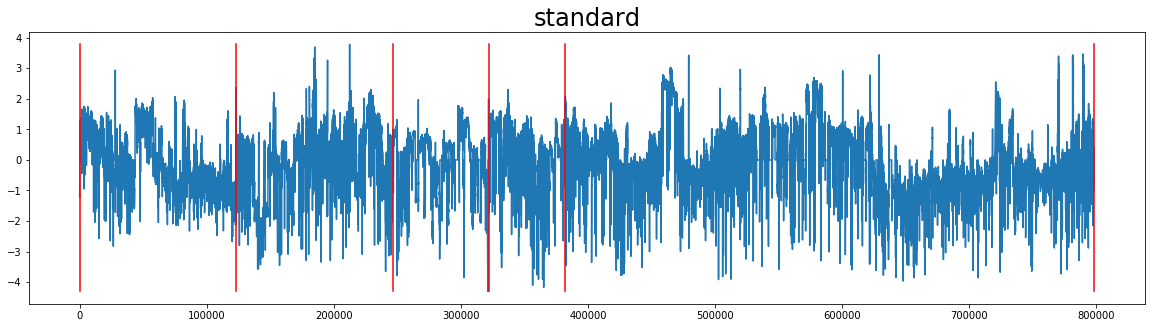

/home/administrator/Dropbox/core_data/facies/train_data 205-21b-3
/home/administrator/Dropbox/core_data/facies/train_data 204-20-6a
/home/administrator/Dropbox/core_data/facies/train_data 204-20-1Z
/home/administrator/Dropbox/core_data/facies/train_data 204-19-6
/home/administrator/Dropbox/core_data/facies/train_data 204-24a-6
Loading Well:  205-21b-3
Feature shapes:  [('depth', (3842,)), ('pseudoGR', (3842, 32))]
Loading Well:  204-20-6a
Feature shapes:  [('depth', (3871,)), ('pseudoGR', (3871, 32))]
Loading Well:  204-20-1Z
Feature shapes:  [('depth', (2341,)), ('pseudoGR', (2341, 32))]
Loading Well:  204-19-6
Feature shapes:  [('depth', (1885,)), ('pseudoGR', (1885, 32))]
Loading Well:  204-24a-6
Feature shapes:  [('depth', (13000,)), ('pseudoGR', (13000, 32))]


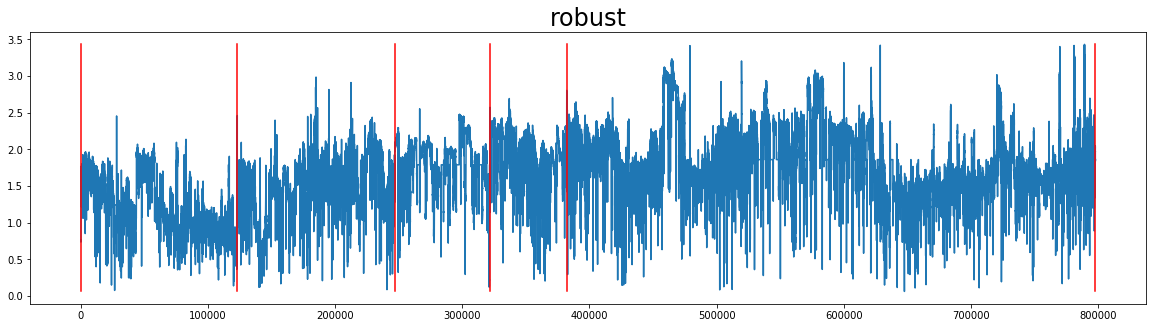

/home/administrator/Dropbox/core_data/facies/train_data 205-21b-3
/home/administrator/Dropbox/core_data/facies/train_data 204-20-6a
/home/administrator/Dropbox/core_data/facies/train_data 204-20-1Z
/home/administrator/Dropbox/core_data/facies/train_data 204-19-6
/home/administrator/Dropbox/core_data/facies/train_data 204-24a-6
Loading Well:  205-21b-3
Feature shapes:  [('depth', (3843,)), ('pseudoGR', (3843, 32))]
Loading Well:  204-20-6a
Feature shapes:  [('depth', (3869,)), ('pseudoGR', (3869, 32))]
Loading Well:  204-20-1Z
Feature shapes:  [('depth', (2341,)), ('pseudoGR', (2341, 32))]
Loading Well:  204-19-6
Feature shapes:  [('depth', (1885,)), ('pseudoGR', (1885, 32))]
Loading Well:  204-24a-6
Feature shapes:  [('depth', (13012,)), ('pseudoGR', (13012, 32))]


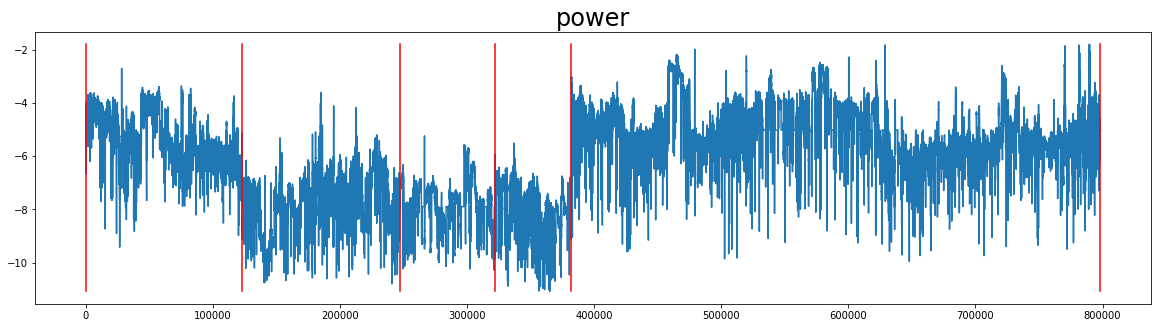

In [2]:
for scale_mode in [None, 'minmax', 'standard', 'robust', 'power']:
    
    fdset = FaciesDataset(["205-21b-3", "204-20-6a", "204-20-1Z", "204-19-6", "204-24a-6"],
                    test_wells=[],
                    features=["pseudoGR"],
                    pseudoGR_args={'scale_mode': scale_mode},
                    label_resolution=32)
    
    fdset.load_or_generate_data()
    
    pGR = fdset.X_train['pseudoGR'].flatten()
    min_y, max_y = pGR.min(), pGR.max()
    
    plt.figure(figsize=(20,5))
    plt.title(scale_mode, size=24)
    plt.plot(np.arange(pGR.size), pGR)
    
    for idx in fdset.X_train['boundary_idxs']:
        plt.plot([idx*32, idx*32], [min_y,max_y], color='red')
        
    plt.show()

## Well Figures

In [8]:
fpd = FaciesDataset(["205-21b-3"],
                    test_wells=['204-19-6'],
                    features=['image', 'pseudoGR', 'logs'],
                    image_args={'scale_mode': None},
                    pseudoGR_args={'scale_mode': None})

fpd.load_or_generate_data()

Loading Well:  205-21b-3  from  /home/administrator/Dropbox/core_data/facies/train_data


Header section Parameter regexp=~P was not found.


Adding NaN log:  SP
Adding NaN log:  DTS
Feature shapes:  [('depth', (3838,)), ('image', (3838, 32, 600, 3)), ('pseudoGR', (3838, 32)), ('logs', (3838, 11))]
Loading Well:  204-19-6  from  /home/administrator/Dropbox/core_data/facies/train_data


Header section Parameter regexp=~P was not found.


Adding NaN log:  DTS
Feature shapes:  [('depth', (1884,)), ('image', (1884, 32, 600, 3)), ('pseudoGR', (1884, 32)), ('logs', (1884, 11))]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


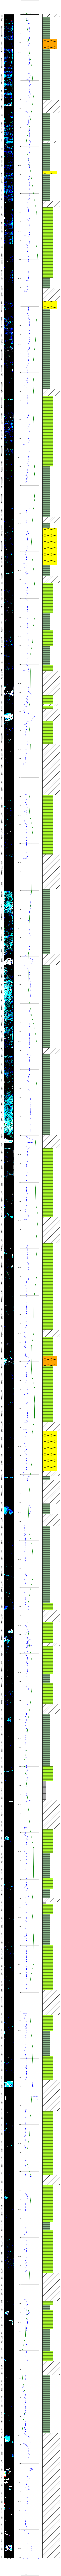

In [3]:
fig, ax = fpd.wells[0].plot_strip(plot_logs=True)
plt.show()

In [22]:
from texture.datasets.util import show_sample

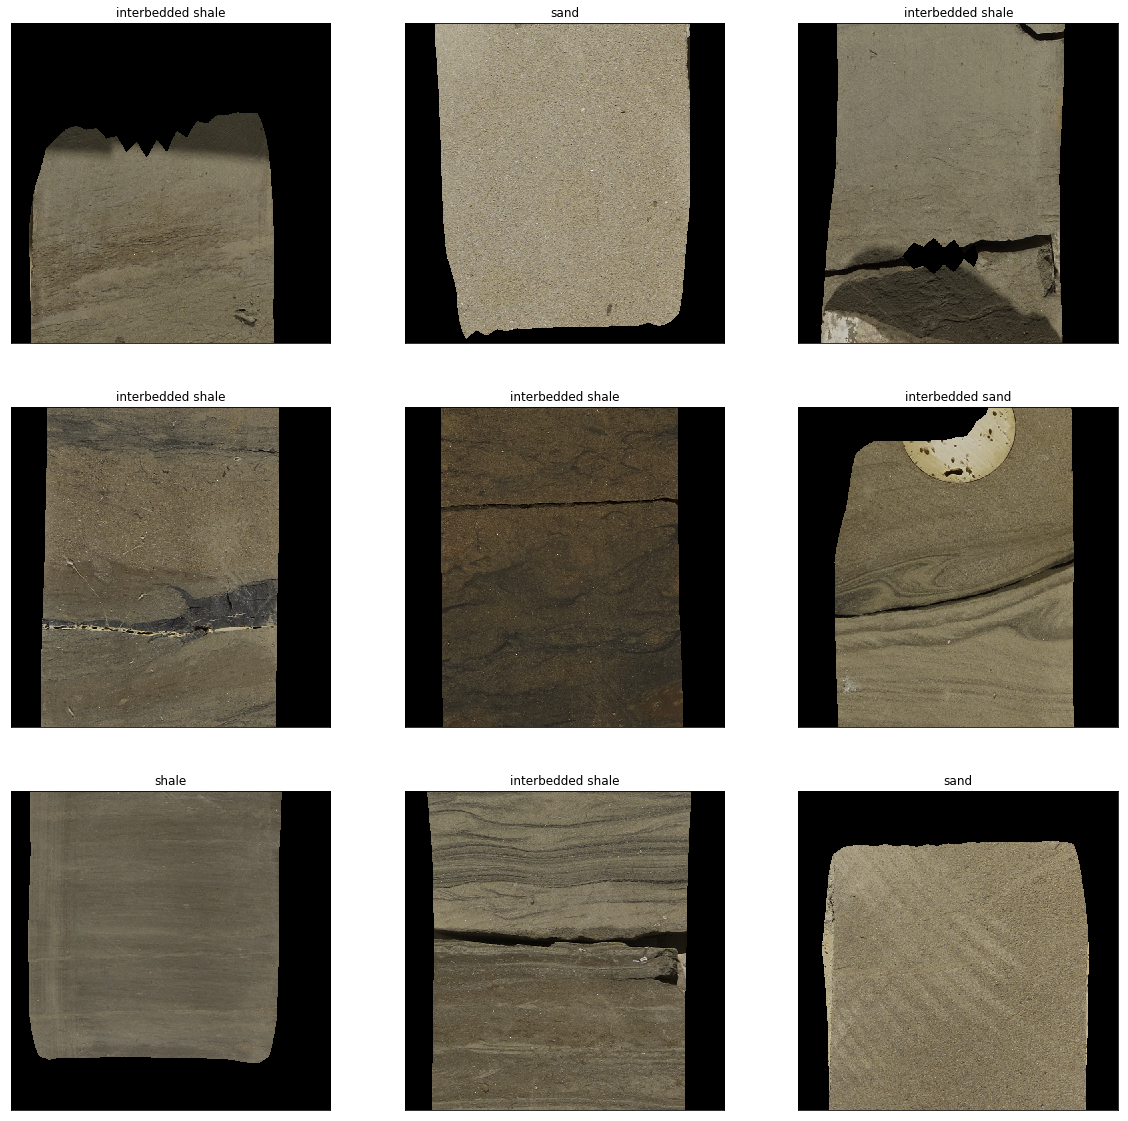

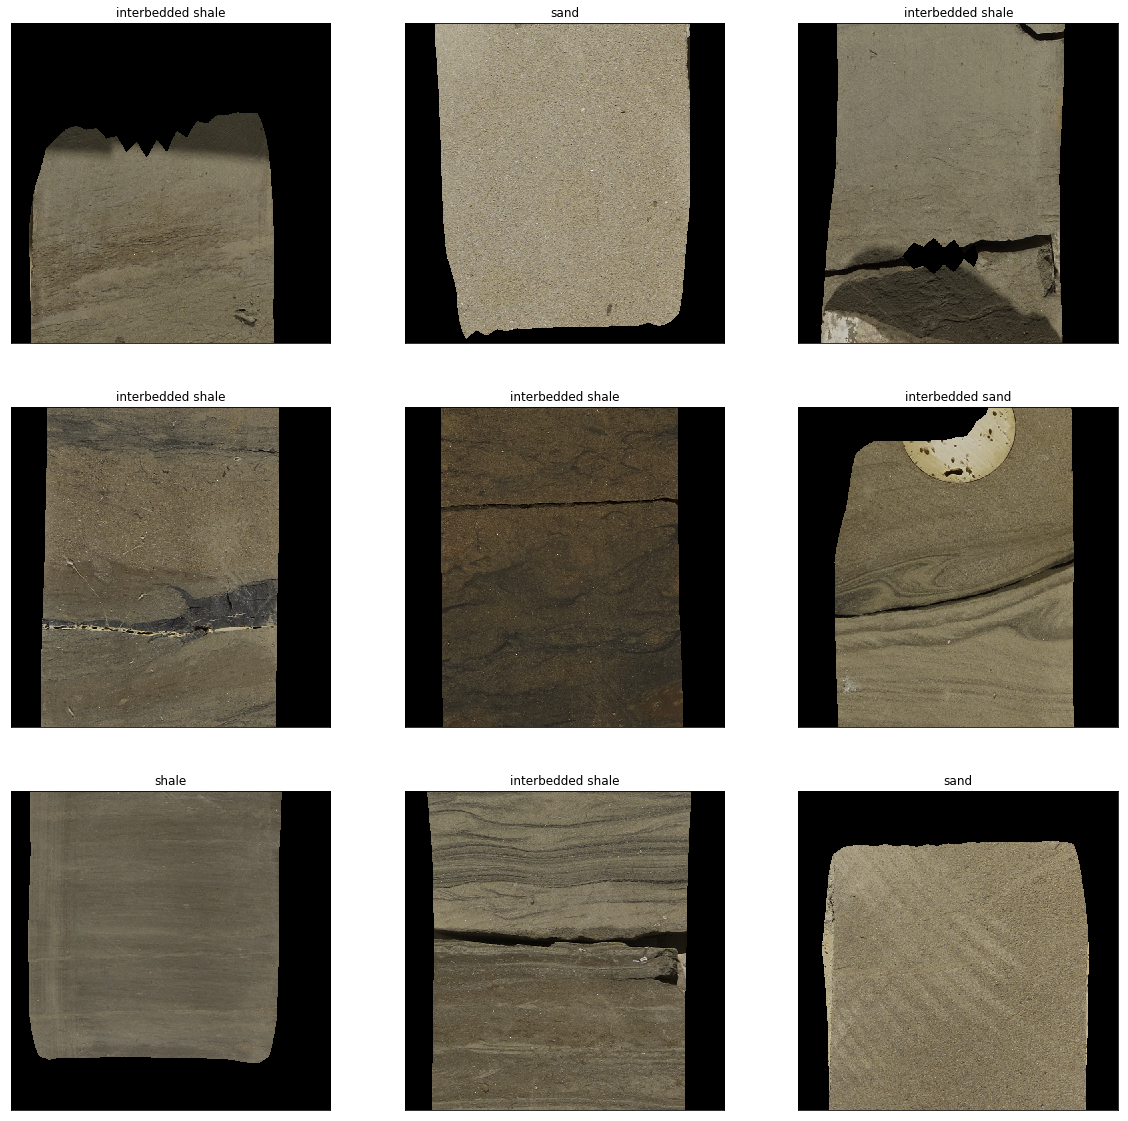

In [24]:
show_sample(fpd)